<a href="https://colab.research.google.com/github/spacemaninSeoul/road_to_NLPmaster/blob/main/Language_model_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**언어 모델(Languagel Model)**이란 단어 시퀀스(문장)에 확률을 할당하는 모델을 말합니다. 어떤 문장들이 있을 때, 기계가 이 문장은 적절해! 이 문장은 말이 안 돼! 라고 사람처럼 정확히 판단할 수 있다면, 기계이 자연어 처리의 성능이 뛰어나다고 말할 수 있습니다.

이번 챕터에서는 통계에 기반한 전통적인 언어 모델(Statistical Languagel Model, SLM)에 대해서 학습합니다. 통계에 기반한 언어 모델은 우리가 실제 사용하는 자연어를 근사하기에는 많은 한계가 있었고, 요즘 들어 인공 신경망이 그러한 한계를 많이 해결해주면서 통계 기반 언어 모델은 많이 사용 용도가 줄었습니다. 하지만 그럼에도 통계 기반 방법론에 대한 이해는 언어 모델에 대한 전체적인 시야를 갖는 일에 도움이 됩니다.



# 1. 언어 모델(Language Model)이란?

**언어 모델(Language Model, LM)**은 언어라는 현상을 모델링하고자 단어 시퀀스(문장)에 확률을 할당(assign)하는 모델입니다.

언어 모델을 만드는 방법은 크게는 **통계를 이용한 방법**과 **인공 신경망을 이용한 방법**으로 구분할 수 있습니다. 최근에는 통계를 이용한 방법보다는 인공 신경망을 이용한 방법이 더 좋은 성능을 보여주고 있습니다. 최근 핫한 자연어 처리의 기술인 GPT나 BERT 또한 인공 신경망 언어 모델의 개념을 사용하여 만들어졌습니다. 이번 챕터에서는 언어 모델의 개념과 언어 모델의 전통적 접근 방식인 통계적 언어 모델에 대해서 배웁니다.




## 1) 언어 모델(Language Model)

언어 모델은 **단어 시퀀스에 확률을 할당(assign)** 하는 일을 하는 모델입니다. 이를 조금 풀어서 쓰면, 언어 모델은 가장 자연스러운 단어 시퀀스를 찾아내는 모델입니다. 단어 시퀀스에 확률을 할당하게 하기 위해서 가장 보편적으로 사용되는 방법은 언어 모델이 **이전 단어들이 주어졌을 때 다음 단어를 예측**하도록 하는 것입니다.

다른 유형의 언어 모델로는 주어진 양쪽의 단어들로부터 가운데 비어있는 단어를 예측하는 언어 모델이 있습니다. 이는 문장의 가운데에 있는 단어를 비워놓고 양쪽의 문맥을 통해서 빈 칸의 단어인지 맞추는 고등학교 수험 시험의 빈칸 추론 문제와 비슷합니다. 이 유형의 언어 모델은 맨 마지막 BERT 챕터에서 다루게 될 예정이고, 그때까지는 이전 단어들로부터 다음 단어를 예측하는 방식에만 집중합니다.

언어 모델에 -ing를 붙인 **언어 모델링(Language Modeling)**은 주어진 단어들로부터 아직 모르는 단어를 예측하는 작업을 말합니다. 즉, 언어 모델이 이전 단어들로부터 다음 단어를 예측하는 일은 언어 모델링입니다.

자연어 처리로 유명한 스탠포드 대학교에서는 언어 모델을 문법(grammar)이라고 비유하기도 합니다. 언어 모델이 단어들의 조합이 얼마나 적절한지, 또는 해당 문장이 얼마나 적합한지를 알려주는 일을 하는 것이 마치 문법이 하는 일 같기 때문입니다.



## 2) 단어 시퀀스의 확률 할당

자연어 처리에서 단어 시퀀스에 확률을 할당하는 일이 왜 필요할까요? 예를 들어보겠습니다. 여기서 대문자 P는 확률을 의미합니다.

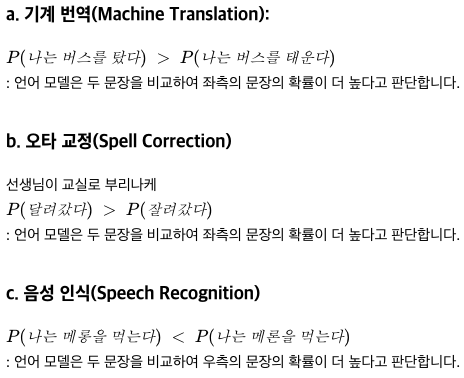

언어 모델은 위와 같이 확률을 통해 **보다 적절한 문장을 판단합니다.**


## 3) 주어진 이전 단어들로부터 다음 단어 예측하기

언어 모델은 단어 시퀀스에 확률을 할당하는 모델입니다. 그리고 단어 시퀀스에 확률을 할당하기 위해서 가장 보편적으로 사용하는 방법은 이전 단어들이 주어졌을 때, 다음 단어를 예측하도록 하는 것입니다. 이를 조건부 확률로 표현해보겠습니다.



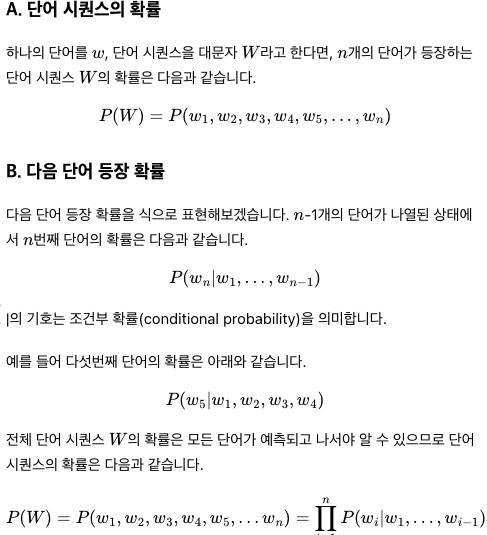

## 4) 언어 모델의 간단한 직관

**비행기를 타려고 공항에 갔는데 지각을 하는 바람에 비행기를 [?]**라는 문장이 있습니다. **'비행기를'** 다음에 어떤 단어가 오게 될지 사람은 쉽게 **'놓쳤다'**라고 예상할 수 있습니다. 우리 지식에 기반하여 나올 수 있는 여러 단어들을 후보에 놓고 놓쳤다는 단어가 나올 확률이 가장 높다고 판단하였기 때문입니다.

그렇다면 기계에게 위 문장을 주고, **'비행기를'** 다음에 나올 단어를 예측해보라고 한다면 과연 어떻게 최대한 정확히 예측할 수 있을까요? 기계도 비슷합니다. 앞에 어떤 단어들이 나왔는지 고려하여 후보가 될 수 있는 여러 단어들에 대해서 확률을 예측해보고 가장 높은 확률을 가진 단어를 선택합니다. 앞에 어떤 단어들이 나왔는지 고려하여 후보가 될 수 있는 여러 단어들에 대해서 등장 확률을 추정하고 가장 높은 확률을 가진 단어를 선택합니다.



## 5) 검색 엔진에서의 언어 모델의 예

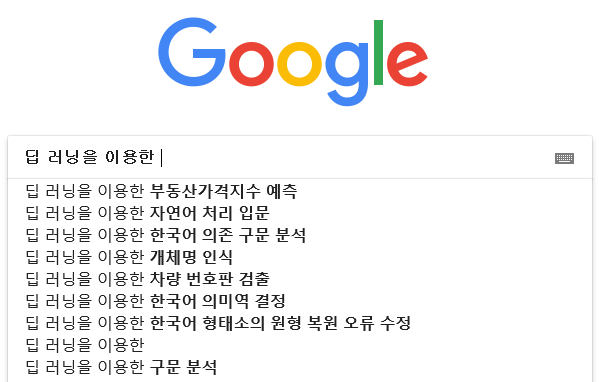

검색 엔진이 입력된 단어들의 나열에 대해서 다음 단어를 예측하는 언어 모델을 사용하고 있습니다.

---

추천하는 언어 모델 참고 자료 :
https://www.cs.bgu.ac.il/~elhadad/nlp18/nlp02.html
http://www.marekrei.com/pub/Machine_Learning_for_Language_Modelling_-_lecture3.pdf



# 2. 통계적 언어 모델(Statistical Language Model, SLM)

언어 모델의 전통적인 접근 방법인 통계적 언어 모델을 소개합니다. 통계적 언어 모델이 통계적인 접근 방법으로 어떻게 언어를 모델링 하는지 배워보겠습니다. 통계적 언어 모델(Statistical Language Model)은 줄여서 SLM이라고 합니다.



## 1) 조건부 확률

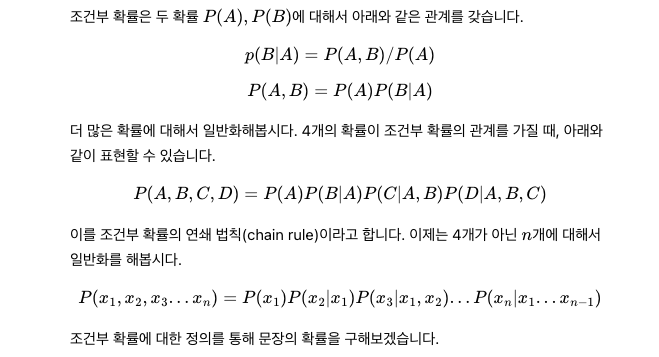

## 2) 문장에 대한 확률

문장 'An adorable little boy is spreading smiles'의 확률

P(An adorable little boy is spreading smiles)를 식으로 표현해봅시다.

각 단어는 문맥이라는 관계로 인해 이전 단어의 영향을 받아 나온 단어입니다. 그리고 모든 단어로부터 하나의 문장이 완성됩니다. 그렇기 때문에 문장의 확률을 구하고자 조건부 확률을 사용하겠습니다. 앞서 언급한 조건부 확률의 일반화 식을 문장의 확률 관점에서 다시 적어보면 문장의 확률은 각 단어들이 이전 단어가 주어졌을 때 다음 단어로 등장할 확률의 곱으로 구성됩니다.



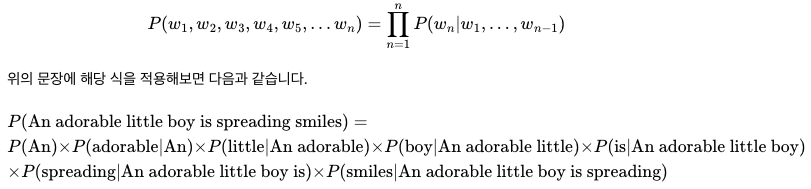

문장의 확률을 구하기 위해서 각 단어에 대한 예측 확률들을 곱합니다.



## 3) 카운트 기반의 접근

문장의 확률을 구하기 위해서 다음 단어에 대한 예측 확률을 모두 곱한다는 것은 알았습니다. 그렇다면 SLM은 이전 단어로부터 다음 단어에 대한 확률은 어떻게 구할까요? 정답은 카운트에 기반하여 확률을 계산합니다.

An adorable little boy가 나왔을 때, is가 나올 확률인
P(is|An adorable little boy)

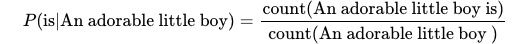

그 확률은 위와 같습니다. 예를 들어 기계가 학습한 코퍼스 데이터에서 An adorable little boy가 100번 등장했는데 그 다음에 is가 등장한 경우는 30번이라고 합시다.
이 경우 P(is|An adorable little boy)
는 30%입니다.



## 4) 카운트 기반 접근의 한계 - 희소 문제(Sparsity Problem)

언어 모델은 실생활에서 사용되는 언어의 확률 분포를 근사 모델링 합니다. 실제로 정확하게 알아볼 방법은 없겠지만 현실에서도 An adorable little boy가 나왔을 때 is가 나올 확률이라는 것이 존재합니다. 이를 실제 자연어의 확률 분포, 현실에서의 확률 분포라고 명칭합시다. 기계에게 많은 코퍼스를 훈련시켜서 언어 모델을 통해 현실에서의 확률 분포를 근사하는 것이 언어 모델의 목표입니다. 그런데 카운트 기반으로 접근하려고 한다면 갖고있는 코퍼스(corpus). 즉, 다시 말해 기계가 훈련하는 데이터는 정말 방대한 양이 필요합니다.



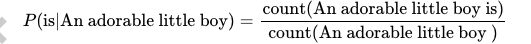

예를 들어 위와 같이 P(is|An adorable little boy)를 구하는 경우에서 기계가 훈련한 코퍼스에 An adorable little boy is라는 단어 시퀀스가 없었다면 이 단어 시퀀스에 대한 확률은 0이 됩니다. 또는 An adorable little boy라는 단어 시퀀스가 없었다면 분모가 0이 되어 확률은 정의되지 않습니다. 그렇다면 코퍼스에 단어 시퀀스가 없다고 해서 이 확률을 0 또는 정의되지 않는 확률이라고 하는 것이 정확한 모델링 방법일까요? 아닙니다. 현실에선 An adorable little boy is 라는 단어 시퀀스가 존재하고 또 문법에도 적합하므로 정답일 가능성 또한 높습니다. 이와 같이 충분한 데이터를 관측하지 못하여 언어를 정확히 모델링하지 못하는 문제를 **희소 문제(sparsity problem)**라고 합니다.



위 문제를 완화하는 방법으로 바로 이어서 배우게 되는 n-gram 언어 모델이나 이 책에서 다루지는 않지만 스무딩이나 백오프와 같은 여러가지 일반화(generalization) 기법이 존재합니다. 하지만 희소 문제에 대한 근본적인 해결책은 되지 못하였습니다. 결국 이러한 한계로 인해 언어 모델의 트렌드는 통계적 언어 모델에서 인공 신경망 언어 모델로 넘어가게 됩니다.



# 3. N-gram 언어 모델(N-gram Language Model)

n-gram 언어 모델은 여전히 카운트에 기반한 통계적 접근을 사용하고 있으므로 SLM의 일종입니다. 다만, 앞서 배운 언어 모델과는 달리 이전에 등장한 모든 단어를 고려하는 것이 아니라 일부 단어만 고려하는 접근 방법을 사용합니다. 그리고 이때 일부 단어를 몇 개 보느냐를 결정하는데 이것이 n-gram에서의 n이 가지는 의미입니다.